# TFM Propensión v2.0


#Libraries

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

from sklearn.model_selection import GridSearchCV

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Getting data

In [3]:
df_cca = pd.read_csv("/content/drive/MyDrive/datasets_TFM + diccionario/customer_commercial_activity.csv", index_col = 0)
df_cp = pd.read_csv("/content/drive/MyDrive/datasets_TFM + diccionario/customer_products.csv", index_col = 0)
df_csd = pd.read_csv("/content/drive/MyDrive/datasets_TFM + diccionario/customer_sociodemographics.csv", index_col = 0)
df_prod = pd.read_csv("/content/drive/MyDrive/datasets_TFM + diccionario/product_description.csv", index_col = 0)
df_sales = pd.read_csv("/content/drive/MyDrive/datasets_TFM + diccionario/sales.csv", index_col = 0)

In [4]:
df0 = pd.merge(df_cp,df_cca,how='inner',on=['pk_cid','pk_partition'])
df = pd.merge(df0,df_csd,how='inner',on=['pk_cid','pk_partition'])

#Data Visualization

In [5]:
df.shape

(5962924, 27)

In [6]:
df.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,0,0,0,0,0,0,0,0,...,2018-01,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,1,0,0,0,0,0,0,0,...,2015-08,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,V,23,N,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
 17  entry_date          object 
 18  entry_channel       object 
 19  active_customer     float64
 20  segment             object 
 21  country_id          object 
 22  region_code         float64
 23  gender              object 
 24  age                 int6

In [8]:
df.isnull().sum()

pk_cid                      0
pk_partition                0
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1541104
dtype: int64

In [9]:
df.nunique()

pk_cid                456373
pk_partition              17
short_term_deposit         2
loans                      2
mortgage                   2
funds                      2
securities                 2
long_term_deposit          2
em_account_pp              1
credit_card                2
payroll                    2
pension_plan               2
payroll_account            2
emc_account                2
debit_card                 2
em_account_p               2
em_acount                  2
entry_date                53
entry_channel             68
active_customer            2
segment                    3
country_id                41
region_code               52
gender                     2
age                      104
deceased                   2
salary                257654
dtype: int64

In [10]:
# revisamos los valores unicos que tienen las columnas de los productos de easymoney
for col in ['active_customer','deceased', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount']:
  print(col,':',df[col].unique())

active_customer : [1. 0.]
deceased : ['N' 'S']
short_term_deposit : [0 1]
loans : [0 1]
mortgage : [0 1]
funds : [0 1]
securities : [0 1]
long_term_deposit : [0 1]
em_account_pp : [0]
credit_card : [0 1]
payroll : [ 0.  1. nan]
pension_plan : [ 0.  1. nan]
payroll_account : [0 1]
emc_account : [0 1]
debit_card : [0 1]
em_account_p : [0 1]
em_acount : [1 0]


# Data Cleaning

In [11]:
# Eliminamos la columna de em_account_pp ya que tiene el mismo valor (0) en todas las filas
df.drop(['em_account_pp'],axis=1,inplace=True)

In [12]:
# Para las columnas de payroll y pension plan, antes de cambiar el tipo de variable tendremos que imputar los valores nulos, en este caso igualaremos los valores nulos a cero, ya que no tenemos la certeza de que los clientes los hayan contratado
df['payroll'].fillna(0.0,inplace=True)
df['pension_plan'].fillna(0.0,inplace=True)
for col in ['payroll','pension_plan']:
  df[col]=df[col].astype(int)

In [13]:
# Cambiar el tipo de variable de las que están incorrectas
for col in ['pk_cid','region_code','active_customer','deceased', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit','credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount']:
  df[col]=df[col].astype(object)

In [14]:
df['gender']=df['gender'].replace({'H':'F','V':'M'})

#Data Visualization

In [15]:
# revisamos la cantidad de registros que tenemos en cada particion de nuestro dataset
df.groupby('pk_partition')['pk_cid'].nunique()

pk_partition
2018-01    239493
2018-02    242521
2018-03    245258
2018-04    247463
2018-05    249926
2018-06    252104
2018-07    339339
2018-08    352922
2018-09    375323
2018-10    402300
2018-11    416387
2018-12    422481
2019-01    426875
2019-02    431727
2019-03    436183
2019-04    439627
2019-05    442995
Name: pk_cid, dtype: int64

In [16]:
# Debido a que lo que queremos obtener es una propensión a la compra, primero elegiremos los productos más relevantes
df_prod

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [17]:
# promedio del margen neto para cada producto
mean_net_margin = df_sales.groupby('product_ID')['net_margin'].mean()
mean_net_margin.sort_values()

product_ID
3819      60.003216
2312      60.016020
2234      69.933216
2235      69.968785
4657      69.973792
8871      70.012927
2335    1486.431322
2336    1496.919186
2673    1497.833362
1119    1499.047159
9001    2183.924000
4033    2532.510000
1364    5976.435908
Name: net_margin, dtype: float64

In [18]:
# número de ventas por producto
prod_sum = df_sales.groupby('product_ID')['pk_sale'].count()
prod_sum.sort_values()

product_ID
4033        10
9001        25
1119       880
2673      1157
2336      4227
2335      4441
2312      5206
8871     12323
2235     18110
2234     18750
1364     19369
3819     38840
4657    117435
Name: pk_sale, dtype: int64

De acuerdo a la tabla de ventas, el producto con un margen neto mayor en promedio es el 1364 (pension_plan), mientras que el producto con más ventas como era de esperarse es el 4657 (em_account), seguido por el 3819 (debit card)
Por lo tanto, lo más adecuado sería hacer el modelo de propensión para pension_plan y ____

In [19]:
# Definimos una funcion que nos arroja las diferencias mensuales entre los productos
def calcula_diferencias_mensuales (dataset, variable):
    dataset[variable+'_pm']  = dataset.groupby('pk_cid')[variable].shift(1)
    dataset['dif_'+variable] = dataset[variable] - dataset[variable+'_pm']
    #dataset['dif_'+variable]  = dataset.groupby('pk_cid')[variable].diff()
    dataset.drop(variable+'_pm',axis=1,inplace=True)

In [20]:
df_sorted = df.sort_values(by=['pk_cid','pk_partition'])

In [21]:
easymoney_products = ['short_term_deposit', 'loans', 'mortgage','funds', 'securities', 'long_term_deposit','credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount']

In [22]:
for x in easymoney_products:
  calcula_diferencias_mensuales(df_sorted,x)

In [23]:
df_dif = df_sorted

In [24]:
df_dif.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,...,dif_securities,dif_long_term_deposit,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount
1479563,15891,2018-07,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2168122,15891,2018-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2962973,16063,2018-11,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3628236,16063,2018-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4028169,16063,2019-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_dif.groupby('pk_partition')['dif_pension_plan'].sum()


pk_partition
2018-01        0
2018-02      612
2018-03      317
2018-04      619
2018-05     -454
2018-06     1433
2018-07     1017
2018-08     -685
2018-09      454
2018-10      548
2018-11      540
2018-12     1450
2019-01    -2827
2019-02     2687
2019-03      686
2019-04      201
2019-05     1107
Name: dif_pension_plan, dtype: object

In [26]:
df_dif.groupby('pk_partition')['dif_long_term_deposit'].sum()

pk_partition
2018-01       0
2018-02      46
2018-03     -37
2018-04      96
2018-05     191
2018-06     164
2018-07     135
2018-08      93
2018-09     182
2018-10     157
2018-11      13
2018-12     236
2019-01    -110
2019-02     -24
2019-03    -124
2019-04    -170
2019-05    -239
Name: dif_long_term_deposit, dtype: object

In [27]:
df_dif.groupby('pk_partition')['dif_emc_account'].sum()

pk_partition
2018-01       0
2018-02     493
2018-03     588
2018-04     504
2018-05     610
2018-06     386
2018-07     212
2018-08     142
2018-09     276
2018-10     216
2018-11     643
2018-12     540
2019-01     871
2019-02     866
2019-03     678
2019-04     960
2019-05    1287
Name: dif_emc_account, dtype: object

In [28]:
df.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,0,0,0,0,0,0,0,0,...,2018-01,KHL,1.0,02 - PARTICULARES,ES,29.0,F,35,N,87218.10
1,1050611,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,M,23,N,35548.74
2,1050612,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,M,23,N,122179.11
3,1050613,2018-01,1,0,0,0,0,0,0,0,...,2015-08,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,F,22,N,119775.54
4,1050614,2018-01,0,0,0,0,0,0,0,0,...,2015-08,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,M,23,N,NaN


# PRODUCTO 1: PENSION PLAN

In [29]:
# Para crear nuestro dataset de entrenamiento, hacemos un join entre las características de los clientes de la partición 2019-01 con la columna del producto de la partición 2019-02
df_a = df[df['pk_partition']=='2019-01']
df_b = df_dif[df_dif['pk_partition']=='2019-02']

In [30]:
df_a.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary'],
      dtype='object')

In [31]:
df_a.drop(['short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card','payroll',
       'pension_plan','payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount'],axis=1,inplace=True)

In [32]:
df_b.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'dif_short_term_deposit', 'dif_loans',
       'dif_mortgage', 'dif_funds', 'dif_securities', 'dif_long_term_deposit',
       'dif_credit_card', 'dif_payroll', 'dif_pension_plan',
       'dif_payroll_account', 'dif_emc_account', 'dif_debit_card',
       'dif_em_account_p', 'dif_em_acount'],
      dtype='object')

In [33]:
df_b.drop(['pk_partition','short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'dif_short_term_deposit', 'dif_loans',
       'dif_mortgage', 'dif_funds', 'dif_securities', 'dif_long_term_deposit',
       'dif_credit_card', 'dif_payroll','dif_payroll_account', 'dif_emc_account', 'dif_debit_card',
       'dif_em_account_p', 'dif_em_acount'],axis=1,inplace=True)

In [34]:
df_pp = pd.merge(df_a,df_b,how='inner',on=['pk_cid'])

In [35]:
df_pp = df_pp.rename(columns={'dif_pension_plan':'pension_plan'})

In [36]:
df_pp.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,pension_plan
0,1432296,2019-01,2018-08,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,20,N,34745.28,0
1,1432294,2019-01,2018-08,KHQ,1.0,03 - UNIVERSITARIO,ES,12.0,F,25,N,184449.27,0
2,1432293,2019-01,2018-08,KHQ,0.0,03 - UNIVERSITARIO,ES,8.0,F,20,N,67044.99,0
3,1432292,2019-01,2018-08,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,23,N,42478.02,0
4,1432297,2019-01,2018-08,KHQ,0.0,03 - UNIVERSITARIO,ES,45.0,F,20,N,89482.35,0


In [37]:
df_pp['pk_partition'] = pd.to_datetime(df_pp['pk_partition'], format='%Y-%m')
df_pp['entry_date'] = pd.to_datetime(df_pp['entry_date'], format='%Y-%m')

In [38]:
# Generamos una función para agregar la columna antiquity con la antiguedad de los clientes en meses

def calculate_antiquity(row):
    years = row['pk_partition'].year - row['entry_date'].year
    months = row['pk_partition'].month - row['entry_date'].month
    return years * 12 + months

In [39]:
df_pp['antiquity'] = df_pp.apply(calculate_antiquity, axis=1)

In [40]:
df_pp.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,pension_plan,antiquity
0,1432296,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,20,N,34745.28,0,5
1,1432294,2019-01-01,2018-08-01,KHQ,1.0,03 - UNIVERSITARIO,ES,12.0,F,25,N,184449.27,0,5
2,1432293,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,8.0,F,20,N,67044.99,0,5
3,1432292,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,23,N,42478.02,0,5
4,1432297,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,45.0,F,20,N,89482.35,0,5


In [41]:
# Nuestro dataset de predicción sería el siguiente:
df_pred = df[df['pk_partition']=='2019-05']

In [42]:
# Antes de eliminar las columnas que no nos interesan, eliminamos las filas de los clientes que ya cuenten con el producto, ya que no se podrá predecir si lo adquirirán o no, si ya lo tienen
df_pred = df_pred.drop(df_pred[df_pred['pension_plan']==1].index)

In [43]:
df_pred.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary'],
      dtype='object')

In [44]:
df_pred.drop(['short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount'],axis=1,inplace=True)

In [45]:
df_pred['pk_partition'] = pd.to_datetime(df_pred['pk_partition'], format='%Y-%m')
df_pred['entry_date'] = pd.to_datetime(df_pred['entry_date'], format='%Y-%m')

In [46]:
# Agregamos la columna de antiquity al dataset de predicción
df_pred['antiquity'] = df_pred.apply(calculate_antiquity, axis=1)

In [47]:
df_pred.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,antiquity
5519929,657826,2019-05-01,2015-05-01,013,1.0,02 - PARTICULARES,ES,25.0,F,44,N,54493.38,48
5519930,657817,2019-05-01,2019-05-01,NaN,0.0,NaN,ES,8.0,M,32,N,NaN,0
5519932,657905,2019-05-01,2017-02-01,KAT,1.0,01 - TOP,ES,28.0,F,85,N,154059.09,27
5519933,657336,2019-05-01,2019-03-01,KAT,1.0,02 - PARTICULARES,ES,28.0,M,38,N,NaN,2
5519934,657147,2019-05-01,2017-06-01,KAT,0.0,02 - PARTICULARES,ES,28.0,F,62,N,104881.71,23


In [48]:
# Eliminamos los registros en los que deceased = 'S' en ambos datasets, ya que es imposible que hayan podido adquirir un producto posteriormente
df_pp = df_pp.drop(df_pp[df_pp['deceased']=='S'].index)
df_pred = df_pred.drop(df_pred[df_pred['deceased']=='S'].index)

In [49]:
df_pp.shape

(425404, 14)

In [50]:
df_pred.shape

(425556, 13)

In [51]:
(df_pp.shape[0])-(df_pred.shape[0])

-152

In [52]:
df_pp.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,pension_plan,antiquity
0,1432296,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,20,N,34745.28,0,5
1,1432294,2019-01-01,2018-08-01,KHQ,1.0,03 - UNIVERSITARIO,ES,12.0,F,25,N,184449.27,0,5
2,1432293,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,8.0,F,20,N,67044.99,0,5
3,1432292,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,3.0,M,23,N,42478.02,0,5
4,1432297,2019-01-01,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,ES,45.0,F,20,N,89482.35,0,5


In [53]:
df_pp.tail()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,pension_plan,antiquity
425467,1036408,2019-01-01,2015-07-01,KHE,1.0,03 - UNIVERSITARIO,ES,34.0,F,23,N,42691.86,0,42
425468,1036429,2019-01-01,2015-07-01,KHE,0.0,03 - UNIVERSITARIO,ES,47.0,F,23,N,81484.08,0,42
425469,1036406,2019-01-01,2015-07-01,KHE,1.0,03 - UNIVERSITARIO,ES,47.0,M,24,N,81952.35,0,42
425470,1036405,2019-01-01,2015-07-01,KHE,1.0,03 - UNIVERSITARIO,ES,37.0,F,25,N,38123.49,0,42
425471,1036407,2019-01-01,2015-07-01,KHE,1.0,03 - UNIVERSITARIO,ES,47.0,F,23,N,44256.39,0,42


#Tratamiento de nulos

Nulos en el dataset de entrenamiento

In [54]:
df_pp.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel        6426
active_customer         0
segment              6541
country_id              0
region_code           147
gender                  2
age                     0
deceased                0
salary             130990
pension_plan            0
antiquity               0
dtype: int64

In [55]:
# Revisamos la cantidad de registros con el producto pension plan contratado, sin contratar y dado de baja, en este caso no consideraremos los dados de baja
df_pp['pension_plan'].value_counts()

 0    418797
 1      4647
-1      1960
Name: pension_plan, dtype: int64

In [56]:
# Separamos el dataframe de entrenamiento entre los productos contratados y no contratados
df_pp1 = df_pp[df_pp['pension_plan']==1]  # Registros con pension plan contratado
df_pp0 = df_pp[df_pp['pension_plan']==0]  # Registros con pension plan sin contratar

In [57]:
# Trataremos los nulos de los registros con el producto contratado ya que contamos con una cantidad limitada de estos
df_pp1.isnull().sum()

pk_cid                0
pk_partition          0
entry_date            0
entry_channel       190
active_customer       0
segment             192
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary             1210
pension_plan          0
antiquity             0
dtype: int64

In [58]:
# Debido a que contamos con 418797 registros en total que no contrataron el producto y solo necesitamos 4647 para equilibrar el dataset de entrenamiento, eliminaremos los registros con nulos
df_pp0.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel        6221
active_customer         0
segment              6334
country_id              0
region_code           147
gender                  2
age                     0
deceased                0
salary             129380
pension_plan            0
antiquity               0
dtype: int64

In [59]:
df_pp0.dropna(axis=0,inplace=True)

In [60]:
df_pp0.shape

(289358, 14)

In [61]:
# Verificamos que se hayan eliminado los registros con nulos
df_pp0.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
country_id         0
region_code        0
gender             0
age                0
deceased           0
salary             0
pension_plan       0
antiquity          0
dtype: int64

In [62]:
df_pp = pd.concat([df_pp1,df_pp0])

In [63]:
df_pp.shape

(294005, 14)

Nulos en el dataset de predicción

In [64]:
df_pred.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel        4485
active_customer         0
segment              4591
country_id              0
region_code           158
gender                  2
age                     0
deceased                0
salary             144660
antiquity               0
dtype: int64

In [65]:
df_pred.shape

(425556, 13)

In [66]:
# Eliminamos los registros con nulos del dataset de predicción, ya que habría una mayor afectación en la calidad de los datos si se rellenan con información errónea
df_pred.dropna(axis=0,inplace=True)


In [67]:
df_pred.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
country_id         0
region_code        0
gender             0
age                0
deceased           0
salary             0
antiquity          0
dtype: int64

# Tratamiento de nulos

In [68]:
# Los nulos de nuestras variables categoricas los podemos sustituir por el valor que aparece con mayor frecuencia
print('El valor mas frecuente en entry_channel es:',df_pp['entry_channel'].mode())
print('El valor mas frecuente en segment es:',df_pp['segment'].mode())
print('El valor mas frecuente en gender es:',df_pp['gender'].mode())

El valor mas frecuente en entry_channel es: 0    KHE
Name: entry_channel, dtype: object
El valor mas frecuente en segment es: 0    03 - UNIVERSITARIO
Name: segment, dtype: object
El valor mas frecuente en gender es: 0    F
Name: gender, dtype: object


In [69]:
df_pp['entry_channel'].fillna(df_pp['entry_channel'].mode().iloc[0],inplace=True)
df_pp['segment'].fillna(df_pp['segment'].mode().iloc[0],inplace=True)
df_pp['gender'].fillna(df_pp['gender'].mode().iloc[0],inplace=True)

In [70]:
# Para la columna region_code verificamos la cantidad de registros a los que no les aplica ya que corresponden a paises distintos a Espana
df_pp[df_pp['country_id']!='ES'].shape[0]

0

In [71]:
df_pp['salary'].describe()

count    2.927950e+05
mean     1.164524e+05
std      2.072380e+05
min      1.202730e+03
25%      6.155540e+04
50%      8.881206e+04
75%      1.321519e+05
max      2.889440e+07
Name: salary, dtype: float64

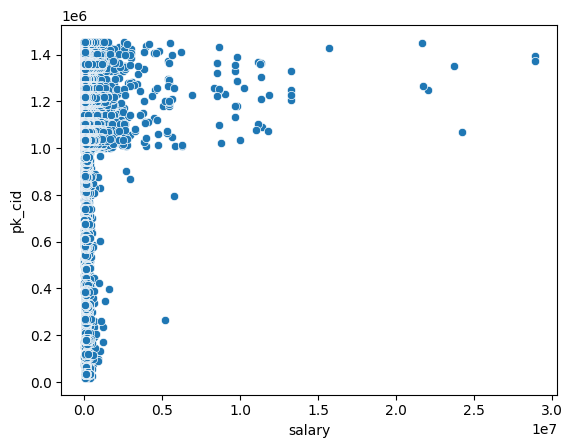

In [72]:
sns.scatterplot(data=df_pp, x='salary', y='pk_cid')
plt.show()

In [73]:
# Debido a que la variable salary contiene valores con outliers, podemos en este caso imputar los nulos con la mediana
df_pp['salary'] = df_pp['salary'].fillna(df_pp['salary'].median())

In [74]:
df_pp.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
country_id         0
region_code        0
gender             0
age                0
deceased           0
salary             0
pension_plan       0
antiquity          0
dtype: int64

Variables Categóricas

In [75]:
# Eliminamos la columna 'deceased' ya que no aportará valor al modelo, antes nos aseguramos que tenga un solo valor en ambos datasets
df_pp['deceased'].unique()

array(['N'], dtype=object)

In [76]:
df_pred['deceased'].unique()

array(['N'], dtype=object)

In [77]:
df_pp.drop('deceased',axis=1,inplace=True)
df_pred.drop('deceased',axis=1,inplace=True)

In [78]:
# Cambiamos la variable categórica pension_plan por entero
df_pp['pension_plan'] = df_pp['pension_plan'].astype(int)

In [79]:
# En el caso de las columnas entry_channel y country_id verificamos la cantidad de categorias que tenemos
df_pp['entry_channel'].unique()

array(['KHQ', 'KHN', 'KHM', 'RED', 'KAT', 'KHO', 'KFA', 'KHL', 'KFC',
       'KHE', 'KAS', '013', '007', 'KHK', 'KHP', 'KHF', 'KBG', 'KHC',
       'KAE', 'KHD', 'KAZ', 'KCC', '004', 'KAY', 'KBZ', 'KBE', 'KBU',
       'KAB', 'KBW', 'KDR', 'KCB', 'KCL', 'KAG', 'KBO', 'KCK', 'KAK',
       'KEH', 'KCH', 'KAQ', 'KAR', 'KAM', 'KAJ', 'KAH', 'KFS', 'KAA',
       'KFF', 'KFD', 'KGX', 'KBH', 'KEJ', 'KAW', 'KAF', 'KBY', 'KCI',
       'KFK', 'KDT', 'KAD', 'KDH', 'KGC'], dtype=object)

In [80]:
df_pred['entry_channel'].unique()

array(['013', 'KAT', 'KFC', 'KHL', 'KHK', 'KHM', 'KHE', 'KFA', 'KAR',
       'KHN', '007', 'KHC', 'RED', 'KAG', 'KCH', 'KAZ', 'KAQ', 'KAJ',
       'KAW', 'KHQ', 'KBG', 'KHO', 'KAY', 'KFD', 'KBH', 'KAA', 'KAE',
       'KBY', 'KHD', 'KAM', 'KAF', 'KBZ', 'KCI', 'KAB', 'KFS', 'KAH',
       'KFF', 'KGX', 'KAS', 'KBU', 'KBW', 'KCC', 'KCB', 'KDR', 'KCL',
       'KCK', 'KBO', 'KDT', 'KAD', 'KHF', 'KHP', 'KAK', 'KDH', 'KFK',
       'KEH', 'KGC'], dtype=object)

In [81]:
df_pp['entry_channel'].nunique()

59

In [82]:
df_pred['entry_channel'].nunique()

56

In [83]:
df_pp['entry_channel'].value_counts()

KHE    159462
KFC     47244
KHQ     26436
KAT     21204
KHK     12488
KHM      6638
KHN      4790
KHD      4016
KFA      3710
RED      3218
KHL      2283
KHF      1200
KHO       350
KAZ       308
KHC       284
KBG        96
KHP        41
007        37
KEH        34
013        21
KAG        19
KAS        18
KBZ        11
KAR        10
KAA         9
KAY         7
KAB         7
KAF         6
KFD         5
KAW         4
KCC         4
KCB         3
KAH         3
KAM         3
KAE         3
KCH         3
KAQ         3
KFF         2
KAJ         2
KAK         2
KDH         2
KAD         2
KBH         1
KBY         1
KCI         1
KFK         1
KDT         1
KEJ         1
KDR         1
KGX         1
KFS         1
KCK         1
KBO         1
KCL         1
KBW         1
KBU         1
KBE         1
004         1
KGC         1
Name: entry_channel, dtype: int64

In [84]:
df_pred['entry_channel'].value_counts()

KHE    157096
KFC     42590
KHQ     26180
KAT     19150
KHK     11346
KHM      5817
KHN      4316
KHD      3977
KFA      3170
RED      2753
KHL      2080
KHF      1165
KHO       316
KAZ       273
KHC       259
KBG        88
KHP        40
KEH        34
007        32
KAG        18
KAS        17
013        15
KAR        10
KBZ         9
KAA         8
KAB         7
KAY         6
KAF         5
KFD         5
KCB         3
KAM         3
KAH         3
KAW         3
KCH         3
KAQ         3
KCC         3
KFF         2
KAE         2
KDH         2
KAD         2
KAK         2
KAJ         2
KFK         1
KBO         1
KDT         1
KBU         1
KCK         1
KCL         1
KDR         1
KBW         1
KGX         1
KFS         1
KCI         1
KBY         1
KBH         1
KGC         1
Name: entry_channel, dtype: int64

In [85]:
# Reducimos las 59 categorías de entry channel a 12 por frecuencia de aparición, en la categoría 12 incluimos el resto
categorias_a_agrupar = ['KHO','KAS', '013', '007', 'KHP', 'KHF', 'KBG', 'KHC','KAE', 'KAZ', 'KCC', '004', 'KAY', 'KBZ',
                        'KBE', 'KBU','KAB', 'KBW', 'KDR', 'KCB', 'KCL', 'KAG', 'KBO', 'KCK', 'KAK','KEH', 'KCH', 'KAQ',
                        'KAR', 'KAM', 'KAJ', 'KAH', 'KFS', 'KAA','KFF', 'KFD', 'KGX', 'KBH', 'KEJ', 'KAW', 'KAF', 'KBY',
                        'KCI', 'KFK', 'KDT', 'KAD', 'KDH', 'KGC']
df_pp['entry_channel'] = df_pp['entry_channel'].replace(categorias_a_agrupar,'OTHER')

In [86]:
df_pred['entry_channel'] = df_pred['entry_channel'].replace(categorias_a_agrupar,'OTHER')

In [87]:
df_pp['entry_channel'].unique()

array(['KHQ', 'KHN', 'KHM', 'RED', 'KAT', 'OTHER', 'KFA', 'KHL', 'KFC',
       'KHE', 'KHK', 'KHD'], dtype=object)

In [88]:
df_pred['entry_channel'].unique()

array(['OTHER', 'KAT', 'KFC', 'KHL', 'KHK', 'KHM', 'KHE', 'KFA', 'KHN',
       'RED', 'KHQ', 'KHD'], dtype=object)

In [89]:
# Aplicamos el label encoder para las categorías de entry_channel
encoder = LabelEncoder()
df_pp['entry_channel'] = encoder.fit_transform(df_pp['entry_channel'])
df_pred['entry_channel'] = encoder.fit_transform(df_pred['entry_channel'])

In [90]:
# Imprimimos las categorías
print(encoder.classes_)

['KAT' 'KFA' 'KFC' 'KHD' 'KHE' 'KHK' 'KHL' 'KHM' 'KHN' 'KHQ' 'OTHER' 'RED']


In [91]:
df_pp['country_id'].nunique()

1

In [92]:
df_pred['country_id'].nunique()

1

In [93]:
# No tiene caso conservar la columna "country_id" si todos los registros son del mismo pais, por lo que lo mejor será eliminarla
df_pp.drop('country_id',axis=1,inplace=True)
df_pred.drop('country_id',axis=1,inplace=True)

In [94]:
# Las variables segment y gender las trataremos con one hot encoding
print(df_pp['segment'].unique())
print(df_pp['gender'].unique())

['03 - UNIVERSITARIO' '02 - PARTICULARES' '01 - TOP']
['M' 'F']


In [95]:
# Sustituimos los valores de las columnas segment y gender por valores numéricos

#df_pp['segment'] = df_pp['segment'].apply(lambda x:1 if x == '01 - TOP' else 2 if x == '02 - PARTICULARES' else 3)
#df_pred['segment'] = df_pred['segment'].apply(lambda x:1 if x == '01 - TOP' else 2 if x == '02 - PARTICULARES' else 3)

#df_pp['gender'] = df_pp['gender'].apply(lambda x:1 if x == 'M' else 2)
#df_pred['gender'] = df_pred['gender'].apply(lambda x:1 if x == 'M' else 2)

In [96]:
# Cambiamos el tipo de variable para la columna 'active_customer'
df_pp['active_customer']=df_pp['active_customer'].astype(int)
df_pred['active_customer']=df_pred['active_customer'].astype(int)

In [97]:
# Region_code es una variable numérica pero categórica

# cambiamos la variable por el valor de la media de la target por categoría
!pip install category_encoders
from category_encoders import TargetEncoder

df_pp['region_code'] = df_pp['region_code'].astype('category')
df_pred['region_code'] = df_pred['region_code'].astype('category')

codificador = TargetEncoder()
df_pp['region_code'] = codificador.fit_transform(df_pp['region_code'], df_pp['pension_plan'])
df_pred['region_code'] = codificador.transform(df_pred['region_code'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00


In [98]:
df_pp.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,region_code,gender,age,salary,pension_plan,antiquity
125,1432407,2019-01-01,2018-08-01,9,1,03 - UNIVERSITARIO,0.009327,M,21,207088.89,1,5
375,1432184,2019-01-01,2018-08-01,8,1,02 - PARTICULARES,0.018332,F,54,92492.58,1,5
440,1432484,2019-01-01,2018-08-01,7,1,03 - UNIVERSITARIO,0.018332,M,26,88812.06,1,5
676,1432583,2019-01-01,2018-08-01,11,1,01 - TOP,0.014856,M,49,58054.26,1,5
732,1432505,2019-01-01,2018-08-01,7,1,02 - PARTICULARES,0.024486,M,28,92355.81,1,5


Customer ID

In [99]:
# Antes de eliminar la columna de pk_cid en el dataset df_pred, la guardamos
cust_id = df_pred['pk_cid']

In [100]:
# Eliminamos las columnas pk_cid, pk_partition y entry_date de ambos datasets
df_pp.drop(['pk_cid','pk_partition','entry_date'],axis=1,inplace=True)
df_pred.drop(['pk_cid','pk_partition','entry_date'],axis=1,inplace=True)

In [101]:
df_pp.head()

,entry_channel,active_customer,segment,region_code,gender,age,salary,pension_plan,antiquity
125,9,1,03 - UNIVERSITARIO,0.009327,M,21,207088.89,1,5
375,8,1,02 - PARTICULARES,0.018332,F,54,92492.58,1,5
440,7,1,03 - UNIVERSITARIO,0.018332,M,26,88812.06,1,5
676,11,1,01 - TOP,0.014856,M,49,58054.26,1,5
732,7,1,02 - PARTICULARES,0.024486,M,28,92355.81,1,5


In [102]:
# Cambiamos de lugar la columna antiquity en ambos datasets
nuevo_orden = ['entry_channel','active_customer','segment','region_code','gender','age','antiquity','salary','pension_plan']
df_pp = df_pp.reindex(columns = nuevo_orden)
df_pred = df_pred.reindex(columns = nuevo_orden)

In [103]:
df_pred.drop('pension_plan',axis=1,inplace=True)

In [104]:
df_pp.head()

,entry_channel,active_customer,segment,region_code,gender,age,antiquity,salary,pension_plan
125,9,1,03 - UNIVERSITARIO,0.009327,M,21,5,207088.89,1
375,8,1,02 - PARTICULARES,0.018332,F,54,5,92492.58,1
440,7,1,03 - UNIVERSITARIO,0.018332,M,26,5,88812.06,1
676,11,1,01 - TOP,0.014856,M,49,5,58054.26,1
732,7,1,02 - PARTICULARES,0.024486,M,28,5,92355.81,1


In [105]:
df_pred.head()

,entry_channel,active_customer,segment,region_code,gender,age,antiquity,salary
5519929,10,1,02 - PARTICULARES,0.007423,F,44,48,54493.38
5519932,0,1,01 - TOP,0.024486,F,85,27,154059.09
5519934,0,0,02 - PARTICULARES,0.024486,F,62,23,104881.71
5519936,2,1,01 - TOP,0.003964,F,78,24,81977.58
5519938,2,0,02 - PARTICULARES,0.024486,F,54,36,157268.85


# Sample

In [106]:
# Para la clasificación, necesitamos de un dataset equilibrado

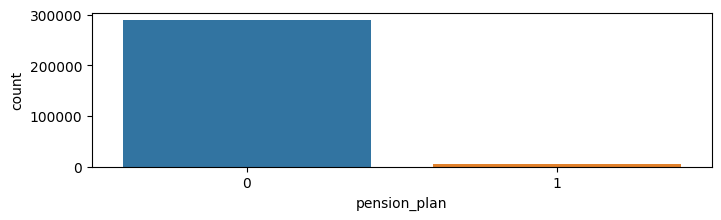

In [107]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.countplot(data=df_pp, x='pension_plan')
plt.show()

In [108]:
df_pp['pension_plan'].value_counts()

0    289358
1      4647
Name: pension_plan, dtype: int64

In [109]:
df_pp['pension_plan'].value_counts(normalize=True).mul(100)


0    98.419415
1     1.580585
Name: pension_plan, dtype: float64

In [110]:
df_pp["pension_plan"].value_counts()

0    289358
1      4647
Name: pension_plan, dtype: int64

In [111]:
# filtramos los productos contratados de los no contratados
contratados = df_pp.loc[df_pp['pension_plan'] == 1]
no_contratados = df_pp.loc[df_pp['pension_plan'] == 0]

In [112]:
contratados.shape

(4647, 9)

In [113]:
# Seleccionamos la muestra de forma aleatoria
no_contratados = no_contratados.sample(len(contratados), replace=False, random_state=42)

In [114]:
contratados.shape

(4647, 9)

In [115]:
no_contratados.shape

(4647, 9)

In [116]:
# se juntan los dataframes de entregados y cancelados en el df_train
df_pp = pd.concat([contratados, no_contratados])

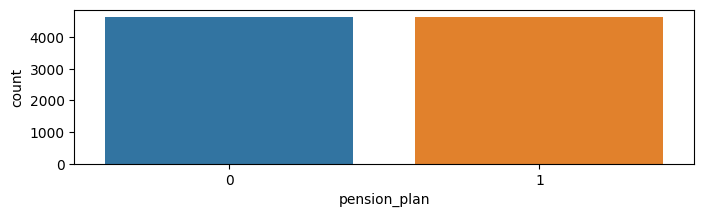

In [117]:
fig, ax = plt.subplots(figsize=(8, 2))
sns.countplot(data=df_pp, x='pension_plan')
plt.show()

In [118]:
df_pp.shape

(9294, 9)

In [119]:
df_pp.head()

,entry_channel,active_customer,segment,region_code,gender,age,antiquity,salary,pension_plan
125,9,1,03 - UNIVERSITARIO,0.009327,M,21,5,207088.89,1
375,8,1,02 - PARTICULARES,0.018332,F,54,5,92492.58,1
440,7,1,03 - UNIVERSITARIO,0.018332,M,26,5,88812.06,1
676,11,1,01 - TOP,0.014856,M,49,5,58054.26,1
732,7,1,02 - PARTICULARES,0.024486,M,28,5,92355.81,1


# Correlaciones

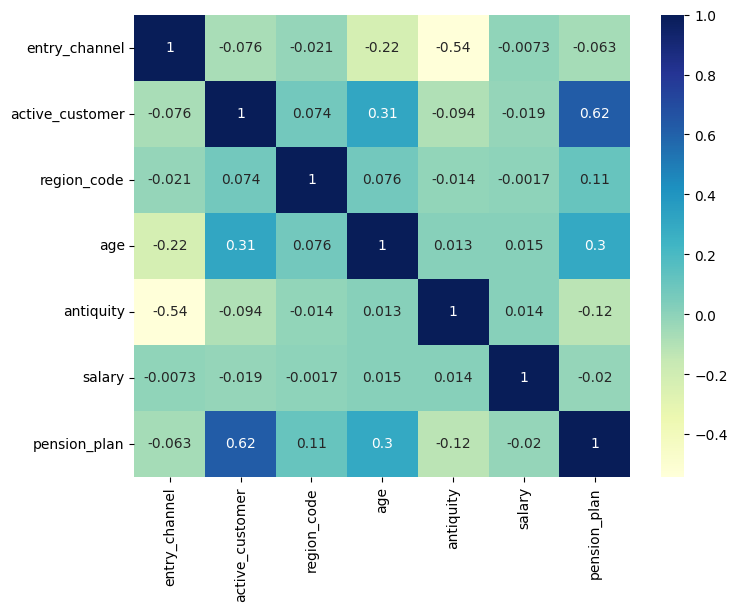

In [120]:
plt.rcParams['figure.figsize'] = 8, 6
sns.heatmap(df_pp.corr(), annot=True, cmap="YlGnBu")
plt.show()


# One hot encoding

In [121]:
df_pp = pd.get_dummies(df_pp)
df_pred = pd.get_dummies(df_pred)

In [122]:
df_pp.head()

,entry_channel,active_customer,region_code,age,antiquity,salary,pension_plan,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_F,gender_M
125,9,1,0.009327,21,5,207088.89,1,0,0,1,0,1
375,8,1,0.018332,54,5,92492.58,1,0,1,0,1,0
440,7,1,0.018332,26,5,88812.06,1,0,0,1,0,1
676,11,1,0.014856,49,5,58054.26,1,1,0,0,0,1
732,7,1,0.024486,28,5,92355.81,1,0,1,0,0,1


In [123]:
df_pred.head()

,entry_channel,active_customer,region_code,age,antiquity,salary,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,gender_F,gender_M
5519929,10,1,0.007423,44,48,54493.38,0,1,0,1,0
5519932,0,1,0.024486,85,27,154059.09,1,0,0,1,0
5519934,0,0,0.024486,62,23,104881.71,0,1,0,1,0
5519936,2,1,0.003964,78,24,81977.58,1,0,0,1,0
5519938,2,0,0.024486,54,36,157268.85,0,1,0,1,0


# Split train/test

In [124]:
# se guarda la target como y y las features como X

y = df_pp['pension_plan']
X = df_pp.drop('pension_plan', axis=1)

# se guarda un 30% de datos para el test y un 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
X_train.shape

(6505, 11)

In [126]:
y_train.shape

(6505,)

# Estandarizacion

In [127]:
df_pred.shape

(280829, 11)

In [128]:
# se estandarizan las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train, con la media de X_train

In [129]:
# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
df_pred = scaler.transform(df_pred)

# Modelado

In [130]:
def medicion(y_t, y_p):
  """imprime la curva ROC y el AUC"""

  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # # method I: plt
  # import matplotlib.pyplot as plt
  # plt.figure(figsize=(8, 6))
  # plt.title('Receiver Operating Characteristic')
  # plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  # plt.legend(loc = 'lower right')
  # plt.plot([0, 1], [0, 1],'r--')
  # plt.xlim([0, 1])
  # plt.ylim([0, 1])
  # plt.ylabel('True Positive Rate')
  # plt.xlabel('False Positive Rate')
  # plt.show()
  return roc_auc

In [131]:
def entrenar(Xtrain, Xtest, ytrain, ytest):
  """entrena 6 módelos.
      imprime la curva roc de cada módelo junto al valor AUC
      devuelve un dataframe con los valores de AUC redondeados a 5 decimales para cada módelo"""

  # creamos la lista de auc vacía
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))

  # Regresión logística
  print('Regresión logística')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('regresión logística', round(roc_auc, 5)))

  # Decision tree classsifier
  print('Decision tree classsifier')
  dt_base = DecisionTreeClassifier(random_state=42)

  dt_base.fit(Xtrain, ytrain)
  y_pred = dt_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier(random_state=42)

  rf_base.fit(Xtrain, ytrain)
  y_pred = rf_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('random forest', round(roc_auc, 5)))

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier(random_state=42)

  gbc_base.fit(Xtrain, ytrain)
  y_pred = gbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = xgb.XGBClassifier(random_state=42)

  xgbc_base.fit(Xtrain, ytrain)
  y_pred = xgbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))

  df_aucs = pd.DataFrame(lista_aucs, columns=['modelos', 'AUC'])
  df_aucs = df_aucs.set_index('modelos')

  return df_aucs

In [132]:
aucs = entrenar(X_train, X_test, y_train, y_test)

Support Vector Machine
Regresión logística
Decision tree classsifier
Random forest
Gradient boosting
XGBClassifier


# AUCS

In [133]:
aucs

,AUC
modelos,
SVC,0.49070
regresión logística,0.78830
decision tree classifier,0.75010
random forest,0.81635
gradient boosting,0.83820
XGB classifier,0.81744


In [134]:
# De acuerdo con la tabla anterior el modelo con mejor desempeño es el gradient boosting

# Gridsearch

In [135]:
# gridsearch
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2],
              'n_estimators': [100, 300, 500],
              'subsample': [0.7, 1],
              'max_depth': [3, 4, 5],
              'max_leaf_nodes': [None, 2, 3]}

In [136]:
gbc_hp =  GradientBoostingClassifier()

In [137]:
# gbc_grid = GridSearchCV(gbc_hp,
#                         parameters,
#                         cv=2,
#                         verbose=True)

# gbc_grid.fit(X_train, y_train)

In [138]:
# # se imprime el modelo con los mejores parametros
# gbc_grid.best_estimator_

In [139]:
# se introducen los parametros del griedsearch
gbc = GradientBoostingClassifier(learning_rate=0.15, max_leaf_nodes=3, subsample=1)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [140]:
roc_auc = medicion(y_test, y_pred)
print(roc_auc)

0.8403522421769098


# PREDICT

In [141]:
# se hace la predicción

pred = gbc.predict(df_pred)
pred

array([1, 1, 0, ..., 0, 0, 0])

In [142]:
# se hace la predicción con la probabilidad para cada categoría

pred_proba = gbc.predict_proba(df_pred)
pred_proba

array([[0.31543112, 0.68456888],
       [0.25765172, 0.74234828],
       [0.9403556 , 0.0596444 ],
       ...,
       [0.98196211, 0.01803789],
       [0.9694145 , 0.0305855 ],
       [0.97955717, 0.02044283]])

In [143]:
pred_proba2 = []
for tupla in pred_proba:
  pred_proba2.append(tupla[1])
pred_proba2

[0.6845688791434895,
 0.7423482818665122,
 0.05964440434645433,
 0.7281746921341048,
 0.0529553051475391,
 0.7307853845458329,
 0.7346245066151179,
 0.05933228809504375,
 0.7036639992990896,
 0.6789218605650237,
 0.04818875351346009,
 0.7512469355337608,
 0.04750175100872905,
 0.043553261832353904,
 0.050313424753221134,
 0.7633709783735622,
 0.04408938306392295,
 0.8792279355331893,
 0.7522151473739835,
 0.0845736706544139,
 0.8558703514437684,
 0.6757417988566136,
 0.7042969242083746,
 0.045530165831322265,
 0.035264419046224106,
 0.675362221825436,
 0.6714603141301617,
 0.7162014447225369,
 0.5294026902615135,
 0.7346245066151179,
 0.8823974031088042,
 0.8094455670032643,
 0.058867545456128934,
 0.8478713012382906,
 0.04405255422406055,
 0.6994678018954411,
 0.04502576594987462,
 0.7156791803870624,
 0.7776957923334434,
 0.05404224479437177,
 0.7929762378778268,
 0.8160008062352067,
 0.8357227009935316,
 0.058237315172486905,
 0.783046002761664,
 0.7284405370752265,
 0.0450257659498

In [144]:
df_prediccion = pd.DataFrame()
df_prediccion['pk_cid'] = cust_id
df_prediccion['prediccion'] = pred
df_prediccion['prediccion_sin_redondeo'] = pred_proba2
df_prediccion

,pk_cid,prediccion,prediccion_sin_redondeo
5519929,657826,1,0.684569
5519932,657905,1,0.742348
5519934,657147,0,0.059644
5519936,658576,1,0.728175
5519938,655419,0,0.052955
...,...,...,...
5962917,1166767,0,0.023860
5962918,1166766,0,0.022497
5962919,1166765,0,0.018038
5962920,1166764,0,0.030585


In [145]:
df_prediccion['prediccion_sin_redondeo'].max()

0.981948152971872

In [154]:
df_pred_max = df_prediccion[df_prediccion['prediccion_sin_redondeo'] > 0.95]
df_last_part = df[df['pk_partition'] == '2019-05']

In [156]:
df_pred_max.shape

(41, 3)

In [157]:
df_pred_pp = pd.merge(df_pred_max,df_last_part,how='inner',on=['pk_cid'])

In [158]:
df_pred_pp.columns

Index(['pk_cid', 'prediccion', 'prediccion_sin_redondeo', 'pk_partition',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll', 'pension_plan',
       'payroll_account', 'emc_account', 'debit_card', 'em_account_p',
       'em_acount', 'entry_date', 'entry_channel', 'active_customer',
       'segment', 'country_id', 'region_code', 'gender', 'age', 'deceased',
       'salary'],
      dtype='object')

In [159]:
df_pred_pp.drop(['pk_partition',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll', 'pension_plan',
       'payroll_account', 'emc_account', 'debit_card', 'em_account_p',
       'em_acount'],axis=1,inplace=True)

In [161]:
df_pred_pp.shape

(41, 13)

In [180]:
for col in df_pred_pp[['entry_channel', 'active_customer','segment', 'country_id', 'region_code', 'gender']]:
  mode = df_pred_pp[col].mode()
  print(mode)

0    KFC
Name: entry_channel, dtype: object
0    1.0
Name: active_customer, dtype: object
0    02 - PARTICULARES
Name: segment, dtype: object
0    ES
Name: country_id, dtype: object
0    28.0
Name: region_code, dtype: object
0    M
Name: gender, dtype: object


In [181]:
df_pred_pp.describe()

,prediccion,prediccion_sin_redondeo,age,salary
count,41.0,41.000000,41.000000,41.000000
mean,1.0,0.967193,38.682927,88775.119024
std,0.0,0.007689,9.117124,25.671618
min,1.0,0.952332,25.000000,88733.820000
25%,1.0,0.962301,31.000000,88753.020000
50%,1.0,0.967335,37.000000,88775.670000
75%,1.0,0.972059,44.000000,88800.030000
max,1.0,0.981948,68.000000,88814.820000


Observamos que entre los clientes con mayor probabilidad de adquirir el producto (mayor al 95%), las características más frecuentes son las siguientes:

- Entry channel: KFC
- Active_customer: 1
- Segment: Particulares
- Pais: ES
- Region_code: 28
- Gender: M

En cuánto a las variables numéricas, los valores promedio son los siguientes:
- Salary: 88,775
- Edad: 38

In [184]:
df_prediccion.to_excel('propension_compra_pension_plan.xlsx', index=False)